I will be carrying out an explanatory analysis on the moscow apartment prices data set. The aim of the analysis is not only to understand the data set better but also answer some of the questions below:

1) Does the Age of the Apartment has an effect on the price?

2) Does having more rooms effect the apartment prices?

3) What effect does different floors have on the apartment prices?

4) Does having more square footage correlates with higher apartment prices?

5) Exploring the listings by using Map?

In [1]:
#libraries
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the file
data = pd.read_csv('moscow_raw_data.csv')

In [3]:
data.head()

,price,repair,year_built_empty,house_age,closest_subway,dist_to_subway,sg,lat,lon,subway_dist_to_center,...,subway_offers,address_offers,rooms,footage,floor,max_floor,first_floor,last_floor,AO,hm
0,8000000,3,0,42,59,960,0.0,55.609009,37.734632,17166,...,5,1.0,1,39.4,11,12,0,0,UAO,panel
1,7200000,2,0,43,59,802,0.0,55.608760,37.741936,17166,...,9,1.0,1,35.6,2,9,0,0,UAO,panel
2,10300000,2,0,43,59,638,0.0,55.610207,37.742495,17166,...,9,2.0,2,53.0,5,12,0,0,UAO,panel
3,8500000,2,0,43,59,929,0.0,55.624017,37.740373,17166,...,5,1.0,2,44.1,8,9,0,0,UAO,panel
4,9000000,2,0,43,59,785,0.0,55.609107,37.740430,17166,...,5,1.0,2,44.2,6,9,0,0,UAO,panel


In [4]:
data.shape

(12181, 22)

### missing values

In [5]:
data.isnull().sum().sum()

0

In [6]:
data.dtypes

price                      int64
repair                     int64
year_built_empty           int64
house_age                  int64
closest_subway             int64
dist_to_subway             int64
sg                       float64
lat                      float64
lon                      float64
subway_dist_to_center      int64
h3                        object
agent_offers               int64
subway_offers              int64
address_offers           float64
rooms                      int64
footage                  float64
floor                      int64
max_floor                  int64
first_floor                int64
last_floor                 int64
AO                        object
hm                        object
dtype: object

## House Prices

C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Distribution of the car prices')

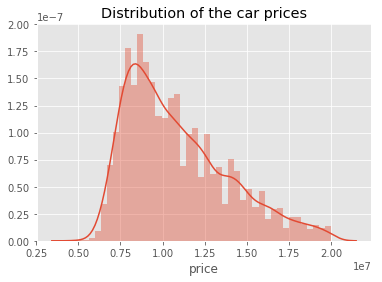

In [7]:
import matplotlib.style as style 
style.use('ggplot')

sns.distplot(data.price)
plt.title('Distribution of the car prices')

In [8]:
round(data['price'].describe(),2)

count       12181.00
mean     10869872.17
std       3037320.38
min       4900000.00
25%       8500000.00
50%      10200000.00
75%      12700000.00
max      20000000.00
Name: price, dtype: float64

In [9]:
min_house = data['price'].min()
max_house = data['price'].max()
max_house
cheapest = data[data['price']==min_house]
cheapest

,price,repair,year_built_empty,house_age,closest_subway,dist_to_subway,sg,lat,lon,subway_dist_to_center,...,subway_offers,address_offers,rooms,footage,floor,max_floor,first_floor,last_floor,AO,hm
6221,4900000,2,0,44,93,864,0.0,55.681705,37.751244,12430,...,16,1.0,2,48.0,13,14,0,0,UVAO,panel


The cheapest apartment in the listing is worth 4.9 million, located on the 13 floor and it was build 40+ years ago.

In [10]:
expensive = data[data['price']==max_house]
expensive
# print('expensive house: ',expensive)

,price,repair,year_built_empty,house_age,closest_subway,dist_to_subway,sg,lat,lon,subway_dist_to_center,...,subway_offers,address_offers,rooms,footage,floor,max_floor,first_floor,last_floor,AO,hm
512,20000000,2,0,33,117,379,0.0,55.666746,37.555777,9905,...,14,1.0,2,51.1,14,16,0,0,UZAO,brick
567,20000000,2,0,12,117,880,0.0,55.676935,37.547495,9905,...,14,1.0,2,56.6,9,10,0,0,UZAO,brick
1013,20000000,2,0,69,175,692,0.0,55.773525,37.629897,1975,...,2,1.0,2,56.2,5,10,0,0,CAO,brick
3096,20000000,3,0,53,25,592,0.0,55.847811,37.646291,10400,...,10,1.0,2,81.6,5,9,0,0,SVAO,brick
3404,20000000,3,0,11,139,1024,0.0,55.681681,37.518147,10917,...,8,1.0,2,66.1,23,24,0,0,UZAO,monolith
3417,20000000,3,0,11,139,1399,0.0,55.667385,37.519863,10917,...,13,1.0,2,55.5,2,22,0,0,UZAO,monolith
3631,20000000,4,0,61,17,1015,0.0,55.785037,37.576483,3421,...,4,1.0,2,58.1,8,9,0,0,SAO,brick
3640,20000000,4,0,61,17,1015,0.0,55.785037,37.576483,3421,...,3,1.0,2,58.1,8,9,0,0,SAO,brick
3930,20000000,4,0,3,161,290,0.0,55.822412,37.432043,13631,...,10,1.0,2,72.0,5,18,0,0,SZAO,monolith
5129,20000000,4,0,5,16,438,0.0,55.863504,37.478400,14800,...,10,1.0,2,76.0,15,35,0,0,SAO,monolith


There are 24 Apartment that are the most expensive listing in Moscow (₽20 Million).It is interesting to see the house age is different across these listing and might be worth investigating that.

## Outliers 

Text(0.5,1,'Boxplot for Moscow Apartment Prices')

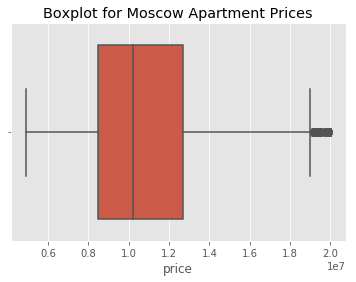

In [11]:
#style.use('seaborn-poster')
sns.boxplot(data.price)
plt.title('Boxplot for Moscow Apartment Prices')

In [12]:
a = round(((data[data['price']>=18000000].shape[0])/12181)*(100),2)
print('Only {}% of the data is consider outlier but for my investigation I think it would be good to include this data. I might remove them when carrying out predictive analysis.'.format(a))

Only 2.87% of the data is consider outlier but for my investigation I think it would be good to include this data. I might remove them when carrying out predictive analysis.


## EDA

1) Does the Age of the Apartment has an effect on the price?

In [13]:
data['house_age_index'] = np.where(data['house_age'] <11,'0-10',np.where((data['house_age'] >10) & (data['house_age'] <21) ,'11-20',np.where((data['house_age'] >20) & (data['house_age'] <51),'21-50',np.where((data['house_age'] >50) & (data['house_age'] <76),'50-75',np.where((data['house_age'] >75) & (data['house_age'] <101),'76-100','100+')))))

In [14]:
mean = round(data.groupby('house_age_index')['price'].mean(),2)

Text(0.5,0,'House Age Group')

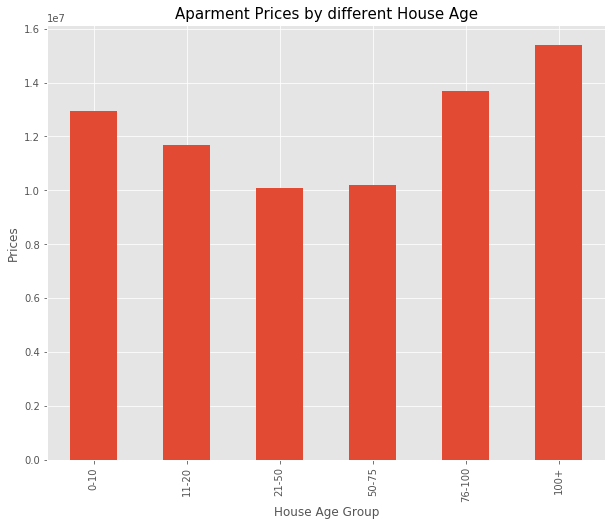

In [15]:
x = mean.sort_index(ascending=False)[:4]
y = mean.sort_index(ascending=False)[5:]
k = mean.sort_index(ascending=False)[4:5]
z = x.append(y)
z = z.sort_index(ascending=True)
z1 = z.append(k)
plt.figure(figsize=(10,8))
z1.plot(kind='bar')
plt.title('Aparment Prices by different House Age',fontsize=15)
plt.ylabel('Prices',fontsize=12)
plt.xlabel('House Age Group',fontsize=12)

There is a trend, we can see new build and older building have higher values compare to 20 to 75 year old buildings. 

2) Does having more rooms effect the apartment prices?

In [16]:
round(data.groupby('rooms')['price'].mean(),2)

rooms
1     9384321.80
2    11843950.61
Name: price, dtype: float64

Having 2 bedroom Apartment increase the price by 26% compare to 1 bedroom on average.

3) What effect does different floors have on the apartment prices?

In [17]:
data['floor_index']= np.where((data['floor']>5) & (data['floor']<11),'6-10',np.where((data['floor']>10) & (data['floor']<16),'11-15',np.where((data['floor']>15) & (data['floor']<21),'16-20',np.where((data['floor']<6) ,'1-5','20+'))))

Text(0.5,0,'Floor Group')

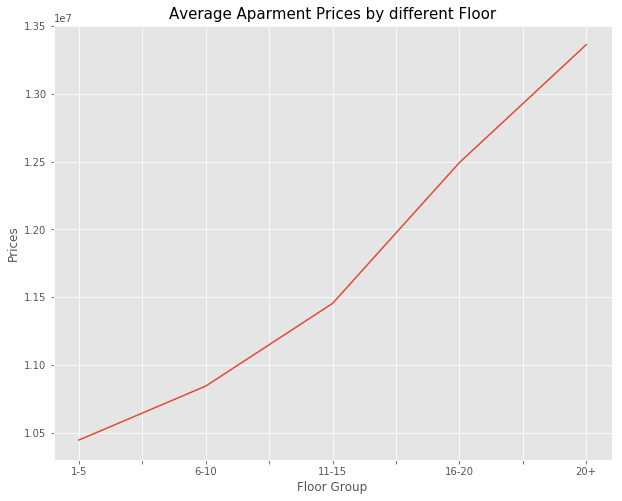

In [20]:
floor = round(data.groupby('floor_index')['price'].mean(),2)
plt.figure(figsize=(10,8))
floor.sort_values().plot()
plt.title('Average Aparment Prices by different Floor',fontsize=15)
plt.ylabel('Prices',fontsize=12)
plt.xlabel('Floor Group',fontsize=12)
#plt.tick_params(axis='both', which='major', labelsize=12)
#plt.tight_layout()

There is a clear trend, we can see the higher floor equates to more expensive apartment.

In [21]:
#floors =  pd.pivot_table(data,index='floor_index',columns ='house_age_index' ,values='price',aggfunc='mean') 

## Footage 

4) Does having more footage means more expensive apartment?

In [27]:
data['footage'].mean()

46.15380264346111

The average apartment in moscow is 46 square footage andwhich was odd but with quick search on google it mentioned 64% of  Russian families live in apartments smaller than 60 square footage. 

link - rbth.com/lifestyle/329033-what-does-typical-russian-home-like

In [22]:
data['footage_index'] = np.where(data['footage']<21,'0-20',np.where((data['footage']>20) & (data['footage']<41),'21-40',np.where((data['footage']>40) & (data['footage']<61),'41-60',np.where((data['footage']>60) & (data['footage']<81),'61-80','80+'))))

In [23]:
footage_num =  pd.pivot_table(data,index='footage_index',values='price',aggfunc='count') 
footage_mean=  pd.pivot_table(data,index='footage_index',values='price',aggfunc='mean') 
footage = pd.merge(footage_num,footage_mean, 'left', on = ["footage_index"])
footage = round(footage,2)
footage = footage.rename(columns={'price_x':'no_of_apartments','price_y':'price'})
footage['pct']=footage['no_of_apartments']/12181

In [24]:
footage

,no_of_apartments,price,pct
footage_index,,,
21-40,4655,8873491.56,0.382153
41-60,6419,11594125.83,0.526968
61-80,1059,14960268.31,0.086939
80+,48,17378998.98,0.003941


There is a clear correlation between more square feet and expensive apartments.

## Map (by lat and long)

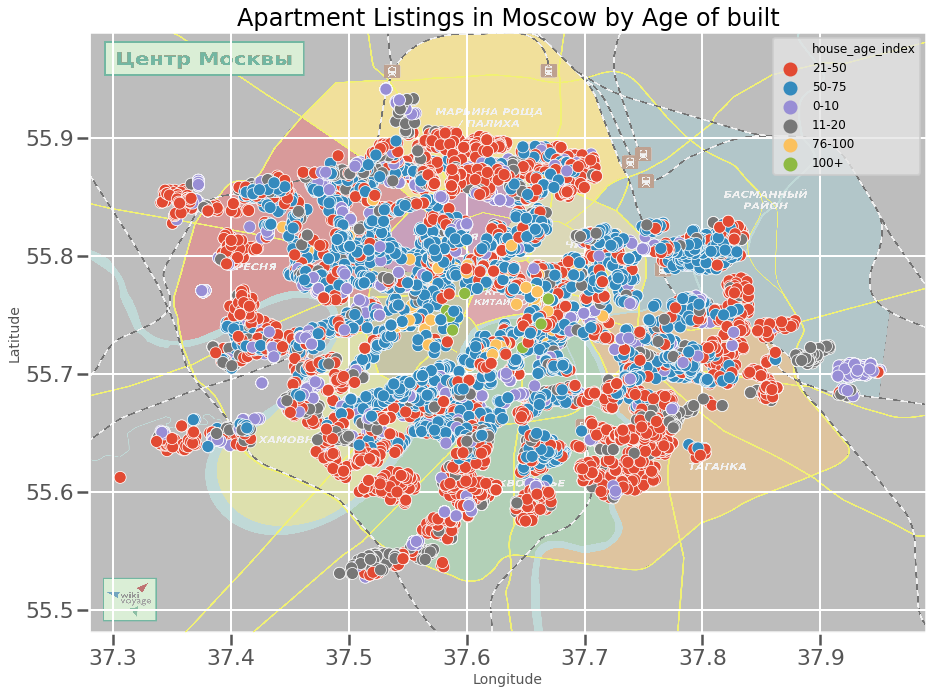

In [60]:
import matplotlib.image as mpimg
NewYork_img=mpimg.imread('moscow.png', 0)
sns.set_context('poster')
plt.figure(figsize=(15,12))
ax =sns.scatterplot(data.lon,data.lat, hue=data.house_age_index)
plt.imshow(NewYork_img,extent=[37.28, 37.99, 55.48, 55.99], alpha=0.5)
plt.title("Apartment Listings in Moscow by Age of built")
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend(fontsize=12)

From the graph above, we can see 75+ age old apartments are built in the center of the city 
- New Apartments (Age 50 below) are build around the city 
- Apartments Between 50 and 75 Age are build outside of the center of the city

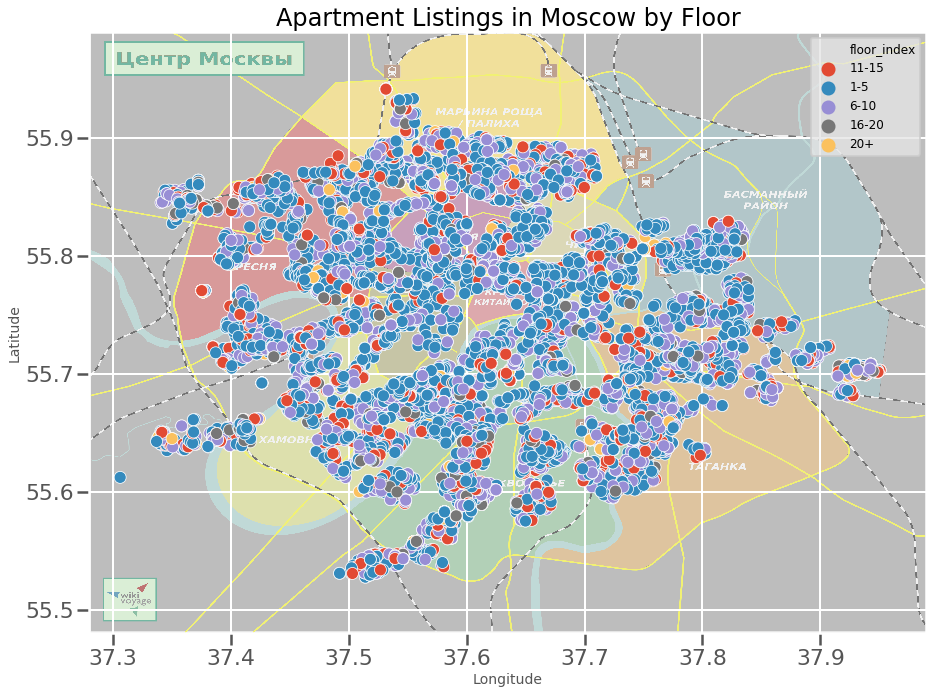

In [25]:
import matplotlib.image as mpimg
NewYork_img=mpimg.imread('moscow.png', 0)
sns.set_context('poster')
plt.figure(figsize=(15,12))
ax =sns.scatterplot(data.lon,data.lat, hue=data.floor_index)
plt.imshow(NewYork_img,extent=[37.28, 37.99, 55.48, 55.99], alpha=0.5)
plt.title("Apartment Listings in Moscow by Floor")
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend(fontsize=12)